---
# Configuration file for post-processing Salish Sea Model results
# Setup for Main Region WWTP model run scenarios
---

In [1]:
import sys
import yaml
import numpy
%matplotlib inline
import matplotlib.pyplot as plt

## Define main directory 

In [2]:
# Main dictionary used to output values to SSM_config.yaml
ssm = {}

## Model variable names for two versions of model output
- The model output used in the bounding scenario runs names variables as "Var_XX". `model_tags` is a dictionary that relates variable names to the model output names.  i.e. ```ssm['var_name']['DO'] yields 'Var_10'```, which is the SSM variable name for "DO"
- The output netcdf from Ben's C++ script yields the `name_list` of variables 

In [3]:
ssm['variables']={}
ssm['variables']['name_list']=['time','depth','DOXG','LDOC','B1','B2',
                    'NH4','NO3','PO4','temp','salinity','RDOC','LPOC',
                    'RPOC','TDIC','TALK','pH','pCO2'] 

## Create array of percentages for depth levels
Multiply these values by the total depth of the water column to get the layer thickness for each model level. This layer thickness is used to calculate volume days.
These values were provided by Su Kyong Yun in her script `volume_calculation.py` on 6/9/2022.

In [4]:
ssm['siglev_diff']=numpy.array(
    [ 3.2,  5.7,  7.5,  8.9, 10.1, 11.1, 12.1, 13. , 13.8, 14.6]
).tolist() #b/c safedump dosn't allow for objects
# # Updated values given by Su Kyong August 10th, 2022, via Teams chat. 
# ssm['siglev_diff']=numpy.array(
#     [3.2, 5.8, 7.4, 9, 9.8, 11.4, 11.8, 13.4, 13.4, 15]
# ).tolist() #b/c safedump dosn't allow for objects

In [5]:
sum(ssm['siglev_diff'])

99.99999999999999

### Define WWTP and river names

In [6]:
# The following WWTP names are from the "Table NLoading1" tab of 
# https://uwnetid.sharepoint.com/:x:/r/sites/og_uwt_psi/_layouts/15/Doc.aspx?sourcedoc=%7B3788B09C-126F-40BF-86AF-22DEC185E831%7D&file=SOG_NB_Figures%26Tables.xlsx&action=default&mobileredirect=true

# The two spaces in front of names reflects formatting of column names in 
# excel spreadsheet
ssm['WWTP_names'] = [
  "  Brightwater",
  "  South King",
  "  West Point",
]

# Some rivers discharge into more than one node and have nutrient
# loading in two columns (namely: Nooksack and Samish Bell).
# Nutrient loading for these rivers is the sum of the columns
ssm['river_names'] = [
   "  Green R_1",
   "  Green R_2"
]
ssm['unique_river_names']=[
    "Green"
]

## Define colors used for color plots (in development)
See [this cheatsheet](https://matplotlib.org/cheatsheets/_images/cheatsheets-2.png) or [this list of named colors](https://matplotlib.org/stable/gallery/color/named_colors.html) for more color options

Run list will include:
1. WWTP
    - a. **Baseline**: all plants on (using output data set for Existing, Ecology (2021))
    - b. **Seasonal 3 mg/L**: West Point, South Plant, Brightwater TIN at 3 mg/L, Apr.-oct.
    - c. **0.85 West Point**: West Point load reduced to 85%, South Plant, Brightwater TIN reduced to 3mg/l, all other WWTPs constant
    - d. **0.85 3 plants**: West Point, South Plant, Brightwater load reduced to 85%, all other WWTPs constant
    - e. **0.5 West Point**: West Point load reduced to 50%, all other WWTPs constant
    - f. **No West Point**: West Point load reduced to 0%, all other WWTPs constant
    - g. **0.5 South**: King County South Plant load reduced to 50%, all other WWTPs constant
    - h. **No South**: King County South Plant load reduced to 0%, all other WWTPs constant
    - i. **0.5 Brightwater**: King County Brightwater load reduced to 50%, all other WWTPs constant
    - j. **No Brightwater**: King County Brightwater load reduced to 0%, all other WWTPs constant
2. Rivers
   - k. **50% Green River**: Green River 50% of additional modern-loading to watershed
   - l. **2x  Green River**: Green River 200% of additional modern-loading to watershed

darkviolet
rebeccapurple
royalblue
darkslategrey
darkslategrey
cyan
steelblue
sienna
teal
royalblue
brown
olive
orchid
midnightblue


findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.


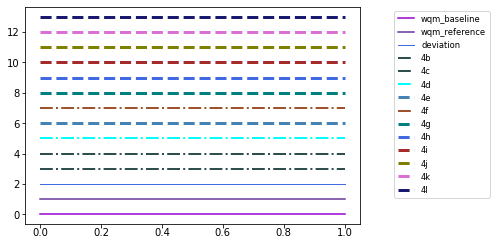

In [7]:
ssm['line']={}
ssm['line']['color']={}
ssm['line']['width']={}
ssm['line']['style']={}

ssm['line']['color']['wqm_baseline'] = 'darkviolet'
ssm['line']['color']['wqm_reference'] = 'rebeccapurple'
ssm['line']['color']['deviation'] = 'royalblue'
ssm['line']['color']['4b']='darkslategrey'
ssm['line']['color']['4c']='darkslategrey'
ssm['line']['color']['4d']='cyan'
ssm['line']['color']['4e']='steelblue'
ssm['line']['color']['4f']= 'sienna'
ssm['line']['color']['4g']= 'teal'
ssm['line']['color']['4h']= 'royalblue' 
ssm['line']['color']['4i']= 'brown'## need to change this and next three colors
ssm['line']['color']['4j']= 'olive'
ssm['line']['color']['4k']= 'orchid'
ssm['line']['color']['4l']= 'midnightblue'

ssm['line']['width']['wqm_baseline'] = 1.5
ssm['line']['width']['wqm_reference'] = 1.5
ssm['line']['width']['deviation'] = 1
ssm['line']['width']['4b']=2.0
ssm['line']['width']['4c']=2.0
ssm['line']['width']['4d']=2.0
ssm['line']['width']['4e']=3.0
ssm['line']['width']['4f']= 2.0
ssm['line']['width']['4g']= 3.0
ssm['line']['width']['4h']= 3.0 ## need to change this and next three lw
ssm['line']['width']['4i']= 3.0
ssm['line']['width']['4j']= 3.0
ssm['line']['width']['4k']= 3.0
ssm['line']['width']['4l']= 3.0

ssm['line']['style']['wqm_baseline'] = 'solid'
ssm['line']['style']['wqm_reference'] = 'solid'
ssm['line']['style']['deviation'] = 'solid'
ssm['line']['style']['4b']='dashdot'
ssm['line']['style']['4c']='dashdot'
ssm['line']['style']['4d']='dashdot'
ssm['line']['style']['4e']='dashed'
ssm['line']['style']['4f']= 'dashdot'
ssm['line']['style']['4g']= 'dashed'
ssm['line']['style']['4h']= 'dashed'
ssm['line']['style']['4i']= 'dashed'
ssm['line']['style']['4j']= 'dashed'
ssm['line']['style']['4k']= 'dashed'
ssm['line']['style']['4l']= 'dashed'

# plot these color options
fig = plt.figure()
ax = plt.axes()
x = numpy.linspace(0, 1, 10)
for idx,case in enumerate(ssm['line']['color']):
    print(ssm['line']['color'][case])
    ax.plot(x,idx*numpy.ones(len(x)),
            color=ssm['line']['color'][case],
            linestyle=ssm['line']['style'][case],
            linewidth=ssm['line']['width'][case],
            label=case)
ax.legend(loc='upper right',bbox_to_anchor=(1.4,1))

## Define black and white line-style formatting

In [8]:
ssm['bw_line']={}
ssm['bw_line']['color']={}
ssm['bw_line']['width']={}
ssm['bw_line']['style']={}
# All scenarios
ssm['bw_line']['color']['scenario']='grey'
ssm['bw_line']['width']['scenario']=1.5
ssm['bw_line']['style']['scenario']='dashed'
# 2014 Baseline condition
ssm['bw_line']['color']['baseline']='black'
ssm['bw_line']['width']['baseline']=1
ssm['bw_line']['style']['baseline']='solid'
# Reference condition
ssm['bw_line']['color']['reference']='black'
ssm['bw_line']['width']['reference']=1.5
ssm['bw_line']['style']['reference']='dashdot'

## Define colors for different parameters

In [9]:
ssm['bar']={}
ssm['bar']['colors']={}
ssm['bar']['colors']['DOXG']='deepskyblue'
ssm['bar']['colors']['NO3']='y'
ssm['bar']['colors']['NH4']='darkolivegreen'

ssm['region']={}
ssm['region']['colors']={}
ssm['region']['colors']['Hood']='darkseagreen'
ssm['region']['colors']['Main']='mediumpurple'
ssm['region']['colors']['SJF_Admiralty']='lightsteelblue'
ssm['region']['colors']['SOG_Bellingham']='rosybrown'
ssm['region']['colors']['South_Sound']='c'
ssm['region']['colors']['Whidbey']='cornflowerblue'
ssm['region']['colors']['ALL_REGIONS']='black'

## Define location(s) for model output and graphics files

## Path definitions

Paths for "full" `netcdfs` of model output: 
-   "/mmfs1/gscratch/ssmc/USRS/PSI/Sukyong/kingcounty/wqm_baseline/ssm_output.nc"
-   "/mmfs1/gscratch/ssmc/USRS/PSI/Sukyong/kingcounty/wqm_reference/ssm_output.nc"
-   "/mmfs1/gscratch/ssmc/USRS/PSI/Rachael/projects/KingCounty/SalishSeaModel/4b/ssm_hotstart_4b.nc"
-   "/mmfs1/gscratch/ssmc/USRS/PSI/Rachael/projects/KingCounty/SalishSeaModel/4c/ssm_hotstart_4c.nc"
-   "/mmfs1/gscratch/ssmc/USRS/PSI/Sukyong/kingcounty/4d/ssm_output.nc"
-   "/mmfs1/gscratch/ssmc/USRS/PSI/Sukyong/kingcounty/4e/ssm_output.nc"
-   "/mmfs1/gscratch/ssmc/USRS/PSI/Sukyong/kingcounty/4f/ssm_output.nc"
-   "/mmfs1/gscratch/ssmc/USRS/PSI/Sukyong/kingcounty/4g/ssm_output.nc"
-   "/mmfs1/gscratch/ssmc/USRS/PSI/Sukyong/kingcounty/4h/ssm_output.nc"
-   "/mmfs1/gscratch/ssmc/USRS/PSI/Sukyong/kingcounty/4i/ssm_output.nc"
-   "/mmfs1/gscratch/ssmc/USRS/PSI/Sukyong/kingcounty/4j/ssm_output.nc"
-   "/mmfs1/gscratch/ssmc/USRS/PSI/Rachael/projects/KingCounty/SalishSeaModel/4k/hotstart_rdm.nc"
-   "/mmfs1/gscratch/ssmc/USRS/PSI/Sukyong/kingcounty/4l/ssm_output.nc"

These combine runs that Su Kyong completed and runs that Rachael completed (4b, 4c, and 4k). 

In [10]:
root_output = '/mmfs1/gscratch/ssmc/USRS/PSI/Sukyong/kingcounty/'
ssm['paths']={}
ssm['paths']['model_output']={}

# directory for Rachael's runs
root_output_rdm = (
    "/mmfs1/gscratch/ssmc/USRS/PSI/Rachael/projects/KingCounty/SalishSeaModel/"
)

# directory for Su Kyong run's loading files
root_output_skloads = (
    "/mmfs1/gscratch/ssmc/USRS/PSI/Sukyong/kingcounty/4x_inputs/"
)

# Main Region cases
ssm['paths']['model_output']['main'] = [
    root_output+'wqm_baseline/ssm_output.nc',
    root_output+'wqm_reference/ssm_output.nc',
    root_output_rdm+'4b/ssm_hotstart_4b.nc',
    root_output_rdm+'4c/ssm_hotstart_4c.nc',
    root_output_skloads+'4d/ssm_output_4d.nc',
    root_output_skloads+'4e/ssm_output_4e.nc',
    root_output_skloads+'4f/ssm_output_4f.nc',
    root_output_skloads+'4g/ssm_output_4g.nc',
    root_output_skloads+'4h/ssm_output_4h.nc',
    root_output_skloads+'4i/ssm_output_4i.nc',
    root_output_skloads+'4j/ssm_output_4j.nc',
    root_output_rdm+'4k/ssm_hotstart_4k.nc',
    root_output_skloads+'4l/ssm_output_4l.nc'
]

ssm['paths']['processed_output'] = ( 
    '/mmfs1/gscratch/ssmc/USRS/PSI/Rachael/projects/KingCounty/data/'
)

# Define directory for saving graphics output
ssm['paths']['graphics'] = (
    '/mmfs1/gscratch/ssmc/USRS/PSI/Rachael/projects/KingCounty/graphics/'
)

# Define directory for saving graphics output
ssm['paths']['movies'] = (
    '/mmfs1/gscratch/ssmc/USRS/PSI/Rachael/projects/KingCounty/movies/'
)

# Define location and name of Shapefile to use for planar graphics
# This version corrects typos in region names and imposes a uniform format for 
# region names

ssm['paths']['shapefile'] = (
    '/mmfs1/gscratch/ssmc/USRS/PSI/Rachael/projects/KingCounty/SalishSeaModel-grid/'\
    'shapefiles/SSMGrid2_tce_ecy_node_info_v2_10102022/SSMGrid2_tce_ecy_node_info_v2_10102022.shp' 
)

# Nutrient loading input files
ssm['paths']['nutrient_loading_inputs']={
    'wqm_baseline':root_output+'WQM/WQM/hotstart/inputs/ssm_pnt_wq.dat',
    'wqm_reference':root_output+'WQM_REF/WQM_REF/hotstart/inputs/ssm_pnt_wq.dat',
    '4b':root_output_rdm+'4b/hotstart/inputs/ssm_pnt_wq.dat',
    '4c':root_output_rdm+'4c/hotstart/inputs/ssm_pnt_wq.dat',
    '4csk':root_output_skloads+'ssm_pnt_wq_4c.dat',
    '4d':root_output_skloads+'ssm_pnt_wq_4d.dat',
    '4e':root_output_skloads+'ssm_pnt_wq_4e.dat',
    '4f':root_output_skloads+'ssm_pnt_wq_4f.dat',
    '4g':root_output_skloads+'ssm_pnt_wq_4g.dat',
    '4h':root_output_skloads+'ssm_pnt_wq_4h.dat',
    '4i':root_output_skloads+'ssm_pnt_wq_4i.dat',
    '4j':root_output_skloads+'ssm_pnt_wq_4j.dat', 
    '4k':root_output_rdm+'4k/hotstart/inputs/ssm_pnt_wq.dat',
    '4l':root_output_skloads+'ssm_pnt_wq_4l.dat' 
}

## Run information

In [11]:
ssm['run_information']={}

# Number of spin-up days removed from model output in post-processing
ssm['run_information']['spin_up_days']=5

# Run descriptions and names
ssm['run_information']['baseline']='wqm_baseline'
ssm['run_information']['reference']='wqm_reference'
# ssm['run_information']['Main_rivers']={
#     'wqm_baseline':'2014 conditions',
#     'wqm_reference':'Reference conditions',
#     '4k':'Mr1',
#     '4l':'Mr2'
# }
# ssm['run_information']['Main_WWTPs']={
#     'wqm_baseline':'2014 conditions',
#     'wqm_reference':'Reference conditions',
#     '4b':'Mtp1',
#     '4c':'Mtp2',
#     '4d':'Mtp3',
#     '4e':'Mtp4',
#     '4f':'Mtp5',
#     '4g':'Mtp6',
#     '4h':'Mtp7',
#     '4i':'Mtp8',
#     '4j':'Mtp9'   
# }

# ssm['run_information']['run_description_short']={}
# ssm['run_information']['run_description_short']['main']={
#     'wqm_baseline':'2014 conditions',
#     'wqm_reference':'Reference',
#     '4b':'Mtp1: West, South, and Brightwater(3 mg/L, April – October)',
#     '4c':'Mtp2: West(85%); South and Brightwater(3 mg/L)',
#     '4d':'Mtp3: West, South, and Brightwater(85%)',
#     '4e':'Mtp4: West(50%)',
#     '4f':'Mtp5: No West',
#     '4g':'Mtp6: South(50%)',
#     '4h':'Mtp7: No South',
#     '4i':'Mtp8: Brightwater(50%)',
#     '4j':'Mtp9: No Brightwater',
#     '4k':'Mr1: Green R.(50%)',
#     '4l':'Mr2: Green R.(200%)'
    
# }

ssm['run_information']['Main_rivers']={
    'wqm_baseline':'2014 conditions',
    'wqm_reference':'Reference conditions',
    '4k':'M.r1',
    '4l':'M.r2'
}
ssm['run_information']['Main_WWTPs']={
    'wqm_baseline':'2014 conditions',
    'wqm_reference':'Reference conditions',
    '4b':'M.tp1',
    '4c':'M.tp2',
    '4d':'M.tp3',
    '4e':'M.tp4',
    '4f':'M.tp5',
    '4g':'M.tp6',
    '4h':'M.tp7',
    '4i':'M.tp8',
    '4j':'M.tp9'   
}

ssm['run_information']['run_description_short']={}
ssm['run_information']['run_description_short']['main']={
    'wqm_baseline':'2014 conditions',
    'wqm_reference':'Reference',
    '4b':'M.tp1: West, South, and Brightwater(3 mg/L, April – October)',
    '4c':'M.tp2: West(85%); South and Brightwater(3 mg/L)',
    '4d':'M.tp3: West, South, and Brightwater(85%)',
    '4e':'M.tp4: West(50%)',
    '4f':'M.tp5: No West',
    '4g':'M.tp6: South(50%)',
    '4h':'M.tp7: No South',
    '4i':'M.tp8: Brightwater(50%)',
    '4j':'M.tp9: No Brightwater',
    '4k':'M.r1: Green R.(50%)',
    '4l':'M.r2: Green R.(200%)'
    
}

ssm['run_information']['run_tag']={}
ssm['run_information']['run_tag']['main']={
    'wqm_baseline':'2014 Conditions',
    'wqm_reference':'Reference',
    '4b':'M.tp1',
    '4c':'M.tp2',
    '4d':'M.tp3',
    '4e':'M.tp4',
    '4f':'M.tp5',
    '4g':'M.tp6',
    '4h':'M.tp7',
    '4i':'M.tp8',
    '4j':'M.tp9',
    '4k':'M.r1',
    '4l':'M.r2'
}

[*ssm['run_information']['run_tag']['main']]

['wqm_baseline',
 'wqm_reference',
 '4b',
 '4c',
 '4d',
 '4e',
 '4f',
 '4g',
 '4h',
 '4i',
 '4j',
 '4k',
 '4l']

In [12]:
tag_list = [ssm['run_information']['run_tag']['main'][tag] for tag in [*ssm['run_information']['run_tag']['main']]]

In [13]:
tag_list.remove('Reference')

In [14]:
tag_list

['2014 Conditions',
 'M.tp1',
 'M.tp2',
 'M.tp3',
 'M.tp4',
 'M.tp5',
 'M.tp6',
 'M.tp7',
 'M.tp8',
 'M.tp9',
 'M.r1',
 'M.r2']

## Save specifications to file
-Use `sort_keys=False` to preserve dictionary order

In [15]:
with open('SSM_config_main.yaml', 'w') as file:
    document = yaml.safe_dump(ssm, file,sort_keys=True)